In [1]:
import pandas as pd
from eval_docking import *
import numpy as np
import matplotlib.pyplot as plt
from posebusters import PoseBusters
from tqdm import tqdm
from rdkit import Chem

In [2]:
def eval_df(df):
    def save_rmsd(x):
        try:
            ret = calculate_symmrmsd(load_molecule_from_sdf(x[0]), load_molecule_from_sdf(x[1]))
        except Exception as e:
            ret = np.inf
        return ret
    def safe_center_rmsd(x):
        try:
            ret = calculate_geometric_center_dist(load_molecule_from_sdf(x[0]), load_molecule_from_sdf(x[1]))
        except Exception as e:
            ret = np.inf
        return ret

    
    df['rmsd'] = df.apply(lambda x: save_rmsd((x.path_pred, x.path_true)), axis=1)
    df['rmsd_center'] = df.apply(lambda x: safe_center_rmsd((x.path_pred, x.path_true)), axis=1)

    df_pb_checks = posebusters_redocking_check(list(df.path_pred), list(df.path_cond))
    passed_tests_df = df_pb_checks.select_dtypes(include=bool)
    passed_tests = passed_tests_df.sum(axis=1)

    df_pb_checks['failed_checks'] = len(passed_tests_df.columns) - passed_tests
    df_pb_checks['pb_valid'] = df_pb_checks.failed_checks == 0

    df = df.merge(df_pb_checks, left_on='path_pred', right_on='file')


    df['ok'] = (df.failed_checks == 0) & (df.rmsd <= 2.0)

    return df, df_pb_checks

In [3]:
def print_results(df):
    print(f'number of rows: {len(df)}')
    print(f'valid_rmsd_caluclations: {df.rmsd.notna().sum()}')
    print(f'valid_rmsd_center_caluclations: {df.rmsd_center.notna().sum()}')
    print(f'rmsd < 2: {(df.rmsd<=2).mean()}')
    print(f'rmsd center < 2: {(df.rmsd_center<=2).mean()}')
    print(f'pb valid: {df.pb_valid.mean()}')
    print(f'rmsd < 2 and pb valid: {df.ok.mean()}')

In [4]:
diffdock_df = pd.read_csv('data/diffdock_lipid.csv')
diffdock_df['pdb'] = diffdock_df.path_cond.apply(lambda x: x.split('/')[7].split('_')[0])
# diffdock_df
umol_df = pd.read_csv('data/umol_lipid.csv')
umol_df['pdb'] = umol_df.path_pred.apply(lambda x: x.split('/')[-2].lower())

# umol_df

In [5]:
pdbs = "1fds 6jdw 1z4r 1at9 3bib 6m8b 6mov 3klp 1e90 1b0o 5u9i 1po8 6i94 1iol 7zh6 5yum 5nu7 1kt3 6i95 5nua 5nyb 7qcz 8gxp 1ptr 2rqf 5h9n 6m8c 3wgp 1fkj 1qkp 4yfr 4yfp 4i9s 2oi2 6m8a 1vyf 1uk7 6rcr 2ksy 1lho 3sph 4q2v 1pbk 5nub 1brx 4h2b 2l6x 3spi 1lhn 4ov0 1e8w 7jx2 1vyg 4i9r 5ce4 4yfq 1hfa 5j5l 2ftb 7yv4 6cy3 3gbg 3weh 3rzn 1jfp 1dht 5ai1 1jdx 6mop 1zng 6m8d 3nq9 6rmk 2wc6 5ik0 5g2a 4ov4 2lbd 1bso 1kt4 1pb9 3vaw 8ex4 1kt5 6i93 5e3q 7civ 6gtp 6m8e 6moq 1tc8 4k80 2hb7 5jxd 3e8w 5hua 1hjg 3wei 1fkl 4ib6 3pmd 4ygg 2dm5 3bqc 1qkt 1jse 1fe3 6ooq 3wek 4kvr 5ha0 4k55 1qsr 1hpk 1d2s 1t7t 4m7m 3dhe 6gvz 1gx9 2wc5 1lke 1g97 1kt7 6w1h 8ex6 1kt6 6iwp 1gx8 3m7r 1cbs 6mor 1zne 1xvv 7wom 3e8t 4kvs 4inw 1fdw 3wej 7bbr 6qjx 4epl 2qp4 6hzp 5zzc 2fke 5zxk 2qhs 7q02 1uby 2r8v 5uja 5ljc 1bxm 7xwt 6pgn 5lkf 5ljb 1pk2 1r2n 1ubx 6yzz 1kdk 5a45 1zht 2vcd 2qia 1zrm 5auz 4lx9 4ych 5aux 4u9v 4b5o 4nv2 2g7b 1ie9 2b04 2rc4 1w66 6gfs 5lke 1ie8 1lnm 7dqg 5iby 8hwp 1zhw 1cgz 1db1 1aqb 2v95 1hmr 2ovd 1oho 6f65 5auy 3w9k 5av4 2avx 5av0 2c8l 2qhu 2fj1 1bob 2wjl 1b87 7dpp 5i8y 4xpl 3sya 2b01 5lje 5ljd 5b09 2b00 4oea 1wub 7fhb 1kdm 7yj8 4nv6 2h3v 2azz 8f6t 6ag5 2qp3 6x12 5av3 1qnl 8a0p 1fbb 3kp9 2qhv 6dcm 3lm5 3d8v 6pq1 6k1z 1i38 6ghh 6noe 7cct 2b03 4cj6 1cgk 6mqw 1fb5 8a0q 2tct 5av2 2zbh 1o1v 6x13 5dhk 1h68 3nn7 3ppt 3ric 4rfr 3kiv 5br5 5kzv 5i93 5ni2 6nbn 6gf9 3adz 1ylv 7ovu 2w1b 5nji 3c13 1ln1 6e2t 7yj7 4ir7 6h7u 4ybp 1vjm 2jf3 8c18 1say 2ick 1kgl 1i37 6nny 6nnx 6ge7 2b18 1kqw 1pkn 5i91 1eii 1gs3 1ap9 6vs1 3blf 4wbk 5zm7 1hbp 1ogz 1qca 1jnq 3ubd 2q1c 1zhz 4quw 2g78 1ln6 3han 6rqo 5ugi 1n83 9jdw 1i2a 1ubw 5br2 6j5y 6sld 6mqj 6mr0 4g24 5auu 4yce 1crb 5auw 6ajx 5t53 1fbk 1zhy 4j6e 4apd 5yk2 6bc4 5i8s 6kkw 2wr6 1yat 6rph 4xh6 1iiu 1lv2 3stm 7vwa 3te4 1e0p 1eio 1zhx 6c32 2q1a 4psb 3lbd 6mqi 8a0o 1h7n 4ybu 5auv 1qko 1fkb 4yh0 2xpv 1s0z 6dgj 1znh 3qp6 1bkf 2pk4 1brd 5yx4 3s0i 5g0g 1gue 4oz9 4m6s 3npr 5h8t 1c9h 2hb8 2h5m 2q8h 7wwg 7wvt 4ygh 5tid 7ytf 8fgy 6j2m 3dj4 5eqi 2lyb 6gw0 4jkw 2g0l 3s0k 6ypf 1brp 1w31 1lri 3tvq 1gxa 3s2u 4ov9 6rnj 3qp4 7y88 5v35 1s0x 5hbs 3lgz 4inx 3kz7 7wwd 3uqb 6qjw 5tie 1qkm 1mx8 2har 3rba 6d35 1s19 6rbm 4azp 2ntu 5lnf 3o5r 1lif 1lhu 2wch 6rbl 7fcx 3qp1 1izc 6mox 3uf8 1fen 4ydb 2xrl 7bwl 7w8f 6m88 3qqa 5iep 7dvn 6ix6 8gyn 6pyf 1lid 1rbp 3spg 3hgy 4qf7 2ntw 7xra 7xr7 3qp2 1uk9 1r84 6m89 1znl 7e1a 1fem 5hwc 8cxo 1f0q 4yda 4ygz 1fkf"
pdbs = pdbs.split(' ')

umol_df = umol_df.loc[umol_df.pdb.isin(pdbs)]
diffdock_df = diffdock_df.loc[diffdock_df.pdb.isin(pdbs)]


In [ ]:
diffdock_res, diffdock_checks = eval_df(diffdock_df)
umol_res, umol_checks = eval_df(umol_df)

umol_df.sort_values('rmsd', ascending=True, inplace=True)
umol_res.drop_duplicates(subset=['path_pred'], keep='first', inplace=True)

In [7]:
print_results(diffdock_res)

number of rows: 375
valid_rmsd_caluclations: 375
valid_rmsd_center_caluclations: 375
rmsd < 2: 0.384
rmsd center < 2: 0.6506666666666666
pb valid: 0.38666666666666666
rmsd < 2 and pb valid: 0.25066666666666665


In [8]:
print_results(umol_res)

number of rows: 402
valid_rmsd_caluclations: 330
valid_rmsd_center_caluclations: 402
rmsd < 2: 0.17412935323383086
rmsd center < 2: 0.4129353233830846
pb valid: 0.08208955223880597
rmsd < 2 and pb valid: 0.04477611940298507


In [37]:
{k:v for k,v in dict(umol_checks.select_dtypes(include=bool).sum()).items() if v < 375}

{'minimum_distance_to_protein': 42,
 'volume_overlap_with_protein': 171,
 'pb_valid': 33}

In [36]:
{k:v for k,v in dict(diffdock_checks.select_dtypes(include=bool).sum()).items() if v < 375}

{'internal_steric_clash': 347,
 'minimum_distance_to_protein': 146,
 'volume_overlap_with_protein': 294,
 'pb_valid': 145}

In [49]:
ok = diffdock_res.loc[diffdock_res.minimum_distance_to_protein]
ok_rmsd = ok.rmsd
ok_natoms = ok.num_atoms

In [50]:
fail = diffdock_res.loc[~diffdock_res.minimum_distance_to_protein]
f_rmsd = fail.rmsd
f_natoms = fail.num_atoms

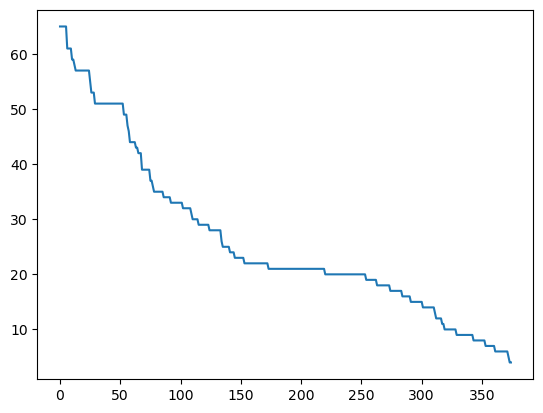

In [60]:
(umol_res.num_atoms < 20).mean()

AttributeError: 'DataFrame' object has no attribute 'num_atoms'